# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [19]:
m = 1
A = 0.05#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [20]:
res=m;
N=2.0^m*1000.0/2.0
Xf=1.0;

dx=Xf/N;
dt=0.1*round(dx,digits=10);
Nt=2.0^m*1000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [21]:
print(N)

1000.0

In [4]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.0005
dt =5.0e-5
dx/dt =10.0


In [5]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [6]:
include("./ScalarField.jl");

In [7]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);

initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=round(dx,digits=10))

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.0005
the time step is 5.0e-5


# Initial data of m β Ψ and Ψ,x

In [8]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [9]:
"""integ=integrator(initX,derpsi_func)
plot(initX1, integ[4:L-3],xlim=[0,0.001])"""

"integ=integrator(initX,derpsi_func)\nplot(initX1, integ[4:L-3],xlim=[0,0.001])"

In [10]:
y0=[0 0 0]
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array = ghost(state_array);

#state_array[4:L-3,3] = rk4wrapper(psiRHS,0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array[4:L-3,3] = integrator(initX,derpsi_func)[4:L-3]

psi_func = Spline1D(initX[4:L-3],state_array[4:L-3,3],k=4)
funcs = [psi_func derpsi_func]
        
y0=[0.0 0.0]
#state_array[4:L-3,1:2] = n_rk4wrapper(mbetaRHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

1×2 Matrix{Float64}:
 0.0  0.0

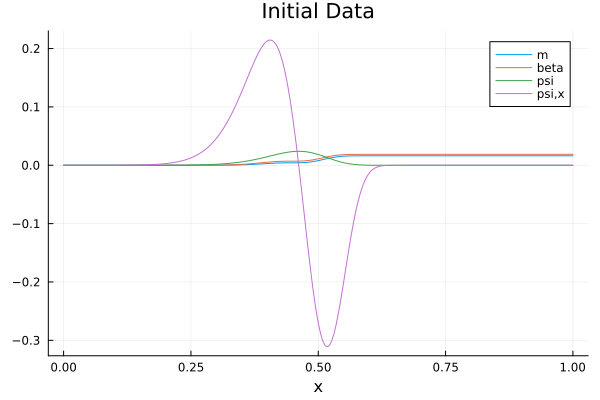

In [11]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [12]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

In [13]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [14]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

10.0


 ## Time evolution

fixed grid

In [15]:
finaltime=1.3#4#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 10 dt is 5.0e-5, time of iteration is 0.0005000000000000001
iteration 20 dt is 5.0e-5, time of iteration is 0.0010000000000000002
iteration 30 dt is 5.0e-5, time of iteration is 0.0014999999999999994
iteration 40 dt is 5.0e-5, time of iteration is 0.0019999999999999987
iteration 50 dt is 5.0e-5, time of iteration is 0.0025
iteration 60 dt is 5.0e-5, time of iteration is 0.0030000000000000014
iteration 70 dt is 5.0e-5, time of iteration is 0.0035000000000000027
iteration 80 dt is 5.0e-5, time of iteration is 0.0040000000000000036
iteration 90 dt is 5.0e-5, time of iteration is 0.0045000000000000005
iteration 100 dt is 5.0e-5, time of iteration is 0.0049999999999999975
iteration 110 dt is 5.0e-5, time of iteration is 0.0054999999999999945
iteration 120 dt is 5.0e-5, time of iteration is 0.0059999999999999915
iteration 130 dt is 5.0e-5, time of iteration is 0.006499999999999988
iteration 140 dt is 5.0e-5, time of iteration is 0.006999999999999985
iteration 150 dt is 5.0e-5, time

iteration 1190 dt is 5.0e-5, time of iteration is 0.05950000000000119
iteration 1200 dt is 5.0e-5, time of iteration is 0.060000000000001205
iteration 1210 dt is 5.0e-5, time of iteration is 0.06050000000000122
iteration 1220 dt is 5.0e-5, time of iteration is 0.061000000000001234
iteration 1230 dt is 5.0e-5, time of iteration is 0.06150000000000125
iteration 1240 dt is 5.0e-5, time of iteration is 0.06200000000000126
iteration 1250 dt is 5.0e-5, time of iteration is 0.06250000000000128
iteration 1260 dt is 5.0e-5, time of iteration is 0.06300000000000122
iteration 1270 dt is 5.0e-5, time of iteration is 0.06350000000000117
iteration 1280 dt is 5.0e-5, time of iteration is 0.06400000000000111
iteration 1290 dt is 5.0e-5, time of iteration is 0.06450000000000106
iteration 1300 dt is 5.0e-5, time of iteration is 0.065000000000001
iteration 1310 dt is 5.0e-5, time of iteration is 0.06550000000000095
iteration 1320 dt is 5.0e-5, time of iteration is 0.06600000000000089
iteration 1330 dt is

iteration 2370 dt is 5.0e-5, time of iteration is 0.11849999999999511
iteration 2380 dt is 5.0e-5, time of iteration is 0.11899999999999505
iteration 2390 dt is 5.0e-5, time of iteration is 0.119499999999995
iteration 2400 dt is 5.0e-5, time of iteration is 0.11999999999999494
iteration 2410 dt is 5.0e-5, time of iteration is 0.12049999999999489
iteration 2420 dt is 5.0e-5, time of iteration is 0.12099999999999483
iteration 2430 dt is 5.0e-5, time of iteration is 0.12149999999999478
iteration 2440 dt is 5.0e-5, time of iteration is 0.12199999999999472
iteration 2450 dt is 5.0e-5, time of iteration is 0.12249999999999467
iteration 2460 dt is 5.0e-5, time of iteration is 0.12299999999999461
iteration 2470 dt is 5.0e-5, time of iteration is 0.12349999999999456
iteration 2480 dt is 5.0e-5, time of iteration is 0.1239999999999945
iteration 2490 dt is 5.0e-5, time of iteration is 0.12449999999999445
iteration 2500 dt is 5.0e-5, time of iteration is 0.1249999999999944
iteration 2510 dt is 5.0

iteration 3550 dt is 5.0e-5, time of iteration is 0.1774999999999886
iteration 3560 dt is 5.0e-5, time of iteration is 0.17799999999998856
iteration 3570 dt is 5.0e-5, time of iteration is 0.1784999999999885
iteration 3580 dt is 5.0e-5, time of iteration is 0.17899999999998845
iteration 3590 dt is 5.0e-5, time of iteration is 0.1794999999999884
iteration 3600 dt is 5.0e-5, time of iteration is 0.17999999999998834
iteration 3610 dt is 5.0e-5, time of iteration is 0.18049999999998828
iteration 3620 dt is 5.0e-5, time of iteration is 0.18099999999998823
iteration 3630 dt is 5.0e-5, time of iteration is 0.18149999999998817
iteration 3640 dt is 5.0e-5, time of iteration is 0.18199999999998812
iteration 3650 dt is 5.0e-5, time of iteration is 0.18249999999998806
iteration 3660 dt is 5.0e-5, time of iteration is 0.182999999999988
iteration 3670 dt is 5.0e-5, time of iteration is 0.18349999999998795
iteration 3680 dt is 5.0e-5, time of iteration is 0.1839999999999879
iteration 3690 dt is 5.0e-

iteration 4730 dt is 5.0e-5, time of iteration is 0.2364999999999821
iteration 4740 dt is 5.0e-5, time of iteration is 0.23699999999998206
iteration 4750 dt is 5.0e-5, time of iteration is 0.237499999999982
iteration 4760 dt is 5.0e-5, time of iteration is 0.23799999999998195
iteration 4770 dt is 5.0e-5, time of iteration is 0.2384999999999819
iteration 4780 dt is 5.0e-5, time of iteration is 0.23899999999998184
iteration 4790 dt is 5.0e-5, time of iteration is 0.23949999999998178
iteration 4800 dt is 5.0e-5, time of iteration is 0.23999999999998173
iteration 4810 dt is 5.0e-5, time of iteration is 0.24049999999998167
iteration 4820 dt is 5.0e-5, time of iteration is 0.24099999999998162
iteration 4830 dt is 5.0e-5, time of iteration is 0.24149999999998156
iteration 4840 dt is 5.0e-5, time of iteration is 0.2419999999999815
iteration 4850 dt is 5.0e-5, time of iteration is 0.24249999999998145
iteration 4860 dt is 5.0e-5, time of iteration is 0.2429999999999814
iteration 4870 dt is 5.0e-

iteration 5910 dt is 5.0e-5, time of iteration is 0.2954999999999756
iteration 5920 dt is 5.0e-5, time of iteration is 0.29599999999997556
iteration 5930 dt is 5.0e-5, time of iteration is 0.2964999999999755
iteration 5940 dt is 5.0e-5, time of iteration is 0.29699999999997545
iteration 5950 dt is 5.0e-5, time of iteration is 0.2974999999999754
iteration 5960 dt is 5.0e-5, time of iteration is 0.29799999999997534
iteration 5970 dt is 5.0e-5, time of iteration is 0.2984999999999753
iteration 5980 dt is 5.0e-5, time of iteration is 0.29899999999997523
iteration 5990 dt is 5.0e-5, time of iteration is 0.2994999999999752
iteration 6000 dt is 5.0e-5, time of iteration is 0.2999999999999751
iteration 6010 dt is 5.0e-5, time of iteration is 0.30049999999997506
iteration 6020 dt is 5.0e-5, time of iteration is 0.300999999999975
iteration 6030 dt is 5.0e-5, time of iteration is 0.30149999999997495
iteration 6040 dt is 5.0e-5, time of iteration is 0.3019999999999749
iteration 6050 dt is 5.0e-5, 

iteration 7100 dt is 5.0e-5, time of iteration is 0.35499999999996906
iteration 7110 dt is 5.0e-5, time of iteration is 0.355499999999969
iteration 7120 dt is 5.0e-5, time of iteration is 0.35599999999996895
iteration 7130 dt is 5.0e-5, time of iteration is 0.3564999999999689
iteration 7140 dt is 5.0e-5, time of iteration is 0.35699999999996884
iteration 7150 dt is 5.0e-5, time of iteration is 0.3574999999999688
iteration 7160 dt is 5.0e-5, time of iteration is 0.35799999999996873
iteration 7170 dt is 5.0e-5, time of iteration is 0.3584999999999687
iteration 7180 dt is 5.0e-5, time of iteration is 0.3589999999999686
iteration 7190 dt is 5.0e-5, time of iteration is 0.35949999999996857
iteration 7200 dt is 5.0e-5, time of iteration is 0.3599999999999685
iteration 7210 dt is 5.0e-5, time of iteration is 0.36049999999996846
iteration 7220 dt is 5.0e-5, time of iteration is 0.3609999999999684
iteration 7230 dt is 5.0e-5, time of iteration is 0.36149999999996835
iteration 7240 dt is 5.0e-5,

iteration 8280 dt is 5.0e-5, time of iteration is 0.41399999999996256
iteration 8290 dt is 5.0e-5, time of iteration is 0.4144999999999625
iteration 8300 dt is 5.0e-5, time of iteration is 0.41499999999996245
iteration 8310 dt is 5.0e-5, time of iteration is 0.4154999999999624
iteration 8320 dt is 5.0e-5, time of iteration is 0.41599999999996234
iteration 8330 dt is 5.0e-5, time of iteration is 0.4164999999999623
iteration 8340 dt is 5.0e-5, time of iteration is 0.41699999999996223
iteration 8350 dt is 5.0e-5, time of iteration is 0.4174999999999622
iteration 8360 dt is 5.0e-5, time of iteration is 0.4179999999999621
iteration 8370 dt is 5.0e-5, time of iteration is 0.41849999999996207
iteration 8380 dt is 5.0e-5, time of iteration is 0.418999999999962
iteration 8390 dt is 5.0e-5, time of iteration is 0.41949999999996196
iteration 8400 dt is 5.0e-5, time of iteration is 0.4199999999999619
iteration 8410 dt is 5.0e-5, time of iteration is 0.42049999999996185
iteration 8420 dt is 5.0e-5,

iteration 9460 dt is 5.0e-5, time of iteration is 0.47299999999995607
iteration 9470 dt is 5.0e-5, time of iteration is 0.473499999999956
iteration 9480 dt is 5.0e-5, time of iteration is 0.47399999999995596
iteration 9490 dt is 5.0e-5, time of iteration is 0.4744999999999559
iteration 9500 dt is 5.0e-5, time of iteration is 0.47499999999995585
iteration 9510 dt is 5.0e-5, time of iteration is 0.4754999999999558
iteration 9520 dt is 5.0e-5, time of iteration is 0.47599999999995574
iteration 9530 dt is 5.0e-5, time of iteration is 0.4764999999999557
iteration 9540 dt is 5.0e-5, time of iteration is 0.4769999999999556
iteration 9550 dt is 5.0e-5, time of iteration is 0.47749999999995557
iteration 9560 dt is 5.0e-5, time of iteration is 0.4779999999999555
iteration 9570 dt is 5.0e-5, time of iteration is 0.47849999999995546
iteration 9580 dt is 5.0e-5, time of iteration is 0.4789999999999554
iteration 9590 dt is 5.0e-5, time of iteration is 0.47949999999995535
iteration 9600 dt is 5.0e-5,

iteration 10640 dt is 5.0e-5, time of iteration is 0.5319999999999496
iteration 10650 dt is 5.0e-5, time of iteration is 0.5324999999999496
iteration 10660 dt is 5.0e-5, time of iteration is 0.5329999999999495
iteration 10670 dt is 5.0e-5, time of iteration is 0.5334999999999495
iteration 10680 dt is 5.0e-5, time of iteration is 0.5339999999999494
iteration 10690 dt is 5.0e-5, time of iteration is 0.5344999999999493
iteration 10700 dt is 5.0e-5, time of iteration is 0.5349999999999493
iteration 10710 dt is 5.0e-5, time of iteration is 0.5354999999999492
iteration 10720 dt is 5.0e-5, time of iteration is 0.5359999999999492
iteration 10730 dt is 5.0e-5, time of iteration is 0.5364999999999491
iteration 10740 dt is 5.0e-5, time of iteration is 0.5369999999999491
iteration 10750 dt is 5.0e-5, time of iteration is 0.537499999999949
iteration 10760 dt is 5.0e-5, time of iteration is 0.537999999999949
iteration 10770 dt is 5.0e-5, time of iteration is 0.5384999999999489
iteration 10780 dt is 

iteration 11820 dt is 5.0e-5, time of iteration is 0.5909999999999431
iteration 11830 dt is 5.0e-5, time of iteration is 0.5914999999999431
iteration 11840 dt is 5.0e-5, time of iteration is 0.591999999999943
iteration 11850 dt is 5.0e-5, time of iteration is 0.592499999999943
iteration 11860 dt is 5.0e-5, time of iteration is 0.5929999999999429
iteration 11870 dt is 5.0e-5, time of iteration is 0.5934999999999429
iteration 11880 dt is 5.0e-5, time of iteration is 0.5939999999999428
iteration 11890 dt is 5.0e-5, time of iteration is 0.5944999999999427
iteration 11900 dt is 5.0e-5, time of iteration is 0.5949999999999427
iteration 11910 dt is 5.0e-5, time of iteration is 0.5954999999999426
iteration 11920 dt is 5.0e-5, time of iteration is 0.5959999999999426
iteration 11930 dt is 5.0e-5, time of iteration is 0.5964999999999425
iteration 11940 dt is 5.0e-5, time of iteration is 0.5969999999999425
iteration 11950 dt is 5.0e-5, time of iteration is 0.5974999999999424
iteration 11960 dt is 

iteration 13000 dt is 5.0e-5, time of iteration is 0.6499999999999366
iteration 13010 dt is 5.0e-5, time of iteration is 0.6504999999999366
iteration 13020 dt is 5.0e-5, time of iteration is 0.6509999999999365
iteration 13030 dt is 5.0e-5, time of iteration is 0.6514999999999365
iteration 13040 dt is 5.0e-5, time of iteration is 0.6519999999999364
iteration 13050 dt is 5.0e-5, time of iteration is 0.6524999999999364
iteration 13060 dt is 5.0e-5, time of iteration is 0.6529999999999363
iteration 13070 dt is 5.0e-5, time of iteration is 0.6534999999999362
iteration 13080 dt is 5.0e-5, time of iteration is 0.6539999999999362
iteration 13090 dt is 5.0e-5, time of iteration is 0.6544999999999361
iteration 13100 dt is 5.0e-5, time of iteration is 0.6549999999999361
iteration 13110 dt is 5.0e-5, time of iteration is 0.655499999999936
iteration 13120 dt is 5.0e-5, time of iteration is 0.655999999999936
iteration 13130 dt is 5.0e-5, time of iteration is 0.6564999999999359
iteration 13140 dt is 

iteration 14180 dt is 5.0e-5, time of iteration is 0.7089999999999301
iteration 14190 dt is 5.0e-5, time of iteration is 0.7094999999999301
iteration 14200 dt is 5.0e-5, time of iteration is 0.70999999999993
iteration 14210 dt is 5.0e-5, time of iteration is 0.71049999999993
iteration 14220 dt is 5.0e-5, time of iteration is 0.7109999999999299
iteration 14230 dt is 5.0e-5, time of iteration is 0.7114999999999299
iteration 14240 dt is 5.0e-5, time of iteration is 0.7119999999999298
iteration 14250 dt is 5.0e-5, time of iteration is 0.7124999999999297
iteration 14260 dt is 5.0e-5, time of iteration is 0.7129999999999297
iteration 14270 dt is 5.0e-5, time of iteration is 0.7134999999999296
iteration 14280 dt is 5.0e-5, time of iteration is 0.7139999999999296
iteration 14290 dt is 5.0e-5, time of iteration is 0.7144999999999295
iteration 14300 dt is 5.0e-5, time of iteration is 0.7149999999999295
iteration 14310 dt is 5.0e-5, time of iteration is 0.7154999999999294
iteration 14320 dt is 5.

iteration 15360 dt is 5.0e-5, time of iteration is 0.7679999999999236
iteration 15370 dt is 5.0e-5, time of iteration is 0.7684999999999236
iteration 15380 dt is 5.0e-5, time of iteration is 0.7689999999999235
iteration 15390 dt is 5.0e-5, time of iteration is 0.7694999999999235
iteration 15400 dt is 5.0e-5, time of iteration is 0.7699999999999234
iteration 15410 dt is 5.0e-5, time of iteration is 0.7704999999999234
iteration 15420 dt is 5.0e-5, time of iteration is 0.7709999999999233
iteration 15430 dt is 5.0e-5, time of iteration is 0.7714999999999232
iteration 15440 dt is 5.0e-5, time of iteration is 0.7719999999999232
iteration 15450 dt is 5.0e-5, time of iteration is 0.7724999999999231
iteration 15460 dt is 5.0e-5, time of iteration is 0.7729999999999231
iteration 15470 dt is 5.0e-5, time of iteration is 0.773499999999923
iteration 15480 dt is 5.0e-5, time of iteration is 0.773999999999923
iteration 15490 dt is 5.0e-5, time of iteration is 0.7744999999999229
iteration 15500 dt is 

iteration 16540 dt is 5.0e-5, time of iteration is 0.8269999999999171
iteration 16550 dt is 5.0e-5, time of iteration is 0.8274999999999171
iteration 16560 dt is 5.0e-5, time of iteration is 0.827999999999917
iteration 16570 dt is 5.0e-5, time of iteration is 0.828499999999917
iteration 16580 dt is 5.0e-5, time of iteration is 0.8289999999999169
iteration 16590 dt is 5.0e-5, time of iteration is 0.8294999999999169
iteration 16600 dt is 5.0e-5, time of iteration is 0.8299999999999168
iteration 16610 dt is 5.0e-5, time of iteration is 0.8304999999999167
iteration 16620 dt is 5.0e-5, time of iteration is 0.8309999999999167
iteration 16630 dt is 5.0e-5, time of iteration is 0.8314999999999166
iteration 16640 dt is 5.0e-5, time of iteration is 0.8319999999999166
iteration 16650 dt is 5.0e-5, time of iteration is 0.8324999999999165
iteration 16660 dt is 5.0e-5, time of iteration is 0.8329999999999165
iteration 16670 dt is 5.0e-5, time of iteration is 0.8334999999999164
iteration 16680 dt is 

iteration 17720 dt is 5.0e-5, time of iteration is 0.8859999999999106
iteration 17730 dt is 5.0e-5, time of iteration is 0.8864999999999106
iteration 17740 dt is 5.0e-5, time of iteration is 0.8869999999999105
iteration 17750 dt is 5.0e-5, time of iteration is 0.8874999999999105
iteration 17760 dt is 5.0e-5, time of iteration is 0.8879999999999104
iteration 17770 dt is 5.0e-5, time of iteration is 0.8884999999999104
iteration 17780 dt is 5.0e-5, time of iteration is 0.8889999999999103
iteration 17790 dt is 5.0e-5, time of iteration is 0.8894999999999103
iteration 17800 dt is 5.0e-5, time of iteration is 0.8899999999999102
iteration 17810 dt is 5.0e-5, time of iteration is 0.8904999999999101
iteration 17820 dt is 5.0e-5, time of iteration is 0.8909999999999101
iteration 17830 dt is 5.0e-5, time of iteration is 0.89149999999991
iteration 17840 dt is 5.0e-5, time of iteration is 0.89199999999991
iteration 17850 dt is 5.0e-5, time of iteration is 0.8924999999999099
iteration 17860 dt is 5.

iteration 18900 dt is 5.0e-5, time of iteration is 0.9449999999999041
iteration 18910 dt is 5.0e-5, time of iteration is 0.9454999999999041
iteration 18920 dt is 5.0e-5, time of iteration is 0.945999999999904
iteration 18930 dt is 5.0e-5, time of iteration is 0.946499999999904
iteration 18940 dt is 5.0e-5, time of iteration is 0.9469999999999039
iteration 18950 dt is 5.0e-5, time of iteration is 0.9474999999999039
iteration 18960 dt is 5.0e-5, time of iteration is 0.9479999999999038
iteration 18970 dt is 5.0e-5, time of iteration is 0.9484999999999038
iteration 18980 dt is 5.0e-5, time of iteration is 0.9489999999999037
iteration 18990 dt is 5.0e-5, time of iteration is 0.9494999999999036
iteration 19000 dt is 5.0e-5, time of iteration is 0.9499999999999036
iteration 19010 dt is 5.0e-5, time of iteration is 0.9504999999999035
iteration 19020 dt is 5.0e-5, time of iteration is 0.9509999999999035
iteration 19030 dt is 5.0e-5, time of iteration is 0.9514999999999034
iteration 19040 dt is 

In [198]:
println(dt)
println(dx)
println(epsilon(dt,dx))
println(epsilon(dt/2,dx))

#se monitor ratio > x, then dt->dt/, epsilon->epsilon*2

5.0e-5
0.0005
0.078125
0.15625


In [199]:
println(dt)
println(dx)
println(epsilon(dt/2,dx))

5.0e-5
0.0005
0.15625


 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
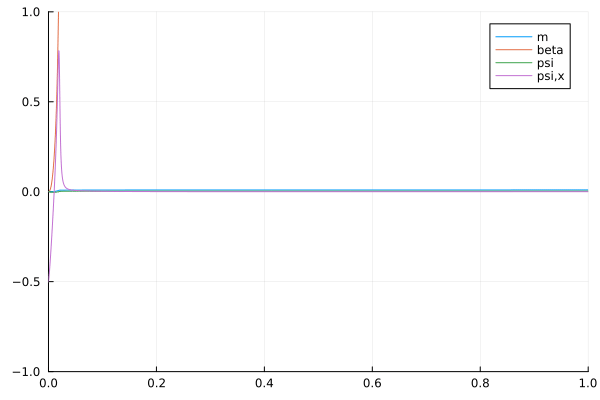

In [16]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 19650:1:19702
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1, 1],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

In [78]:
epsilon(dt,dx)

0.07812500078125001

In [79]:
twod_epsilon(dt,dx)

0.31250000312500004

In [89]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio10.csv" is not a valid file or doesn't exist

In [146]:
epsilon(dt,dx)

0.078125

In [147]:
twod_epsilon(dt,dx)

0.3125

In [37]:

auxinitX= range(0,1,step=dx)
println(Der(state_array,6,4,auxinitX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, auxinitX[6]))

3.017168193837207e-8
0.00017208804225226937


In [53]:
println(Der(state_array,60,4,initX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, initX[60]))

println(derivative(spl, initX[60]).-Der(state_array,60,4,initX))

0.014407887381376435
0.014407810796996974
-7.658437946138352e-8


In [30]:
using Roots
find_zero(derpsi_func, (0,0.5), Bisection())

0.2713799770174635

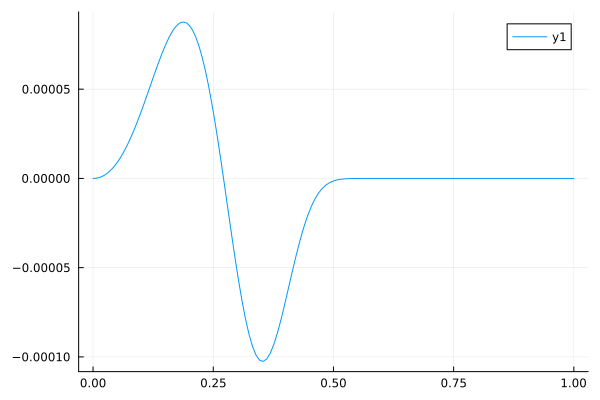

In [23]:
using Plots
plot(initX1, derpsi_func(initX1))

In [66]:
m_func = Spline1D(initX[4:L-3],state_array[4:L-3,1],k=4)
beta_func = Spline1D(initX[4:L-3],state_array[4:L-3,2],k=4)
der_funcs=[derivative(m_func,initX) derivative(beta_func,initX) derivative(derpsi_func,initX)]
der_funcs[2,1] # i is gridpoint, j is function

-1.5086563198078306e-16

In [58]:
derivative(m_func,initX)

207-element Vector{Float64}:
 -3.6298572062043756e-16
 -1.5086563198078306e-16
 -4.2846357130174216e-17
 -3.826449677788914e-18
  1.2955367671949918e-18
  7.621048595599677e-18
  5.1885306005563256e-17
  2.109734086495333e-16
  6.633715930192716e-16
  1.768094158067992e-15
  4.2032891114686175e-15
  9.186535719427543e-15
  1.882331476354324e-14
  ⋮
 -3.776355223175436e-19
 -1.7646519734465227e-20
  1.0587911840678348e-20
  2.2651714422785337e-19
 -1.4750589189488752e-19
 -3.7472920178666525e-19
  6.78866591885402e-20
 -2.96640705754548e-20
  5.421010862427541e-19
  3.1064380724396854e-18
  8.986602830812212e-18
  1.9505851304156383e-17

In [166]:
derivative(derpsi_func,initX1[1])

3.9599527939805415e-10

In [163]:
derivative(derpsi_func,initX1)[1]

3.9599527939805415e-10

In [161]:
derivative(derpsi_func,initX)[4]

3.9599527939805415e-10

In [ ]:
aux=doublegrid(initX1)

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, ylim=[0, 10^(-13)])

##

x2=aux
y2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A);

##

double_resolution=y2
basis_resolution=y1
xs = ( x1, x2 )
ys = ( basis_resolution, double_resolution*16*4 )
p = plot()
map(x->plot!(x[1],x[2],xaxis="x",title="Interpolation error", legend=false), zip(xs, ys))
display(p)
     